<div align="center">

  <a href="https://ultralytics.com/yolov5" target="_blank">
    <img width="1024", src="https://raw.githubusercontent.com/ultralytics/assets/main/yolov5/v70/splash.png"></a>

[中文](https://docs.ultralytics.com/zh/) | [한국어](https://docs.ultralytics.com/ko/) | [日本語](https://docs.ultralytics.com/ja/) | [Русский](https://docs.ultralytics.com/ru/) | [Deutsch](https://docs.ultralytics.com/de/) | [Français](https://docs.ultralytics.com/fr/) | [Español](https://docs.ultralytics.com/es/) | [Português](https://docs.ultralytics.com/pt/) | [العربية](https://docs.ultralytics.com/ar/)

  <a href="https://bit.ly/yolov5-paperspace-notebook"><img src="https://assets.paperspace.io/img/gradient-badge.svg" alt="Run on Gradient"></a>
  <a href="https://colab.research.google.com/github/ultralytics/yolov5/blob/master/tutorial.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
  <a href="https://www.kaggle.com/models/ultralytics/yolov5"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" alt="Open In Kaggle"></a> <br>
 MODIFIED FROM: </br>
This <a href="https://github.com/ultralytics/yolov5">YOLOv5</a> 🚀 notebook by <a href="https://ultralytics.com">Ultralytics</a> presents simple train, validate and predict examples to help start your AI adventure.<br>We hope that the resources in this notebook will help you get the most out of YOLOv5. Please browse the YOLOv5 <a href="https://docs.ultralytics.com/yolov5">Docs</a> for details, raise an issue on <a href="https://github.com/ultralytics/yolov5">GitHub</a> for support, and join our <a href="https://ultralytics.com/discord">Discord</a> community for questions and discussions!

</div>

# Setup

Clone GitHub [repository](https://github.com/ultralytics/yolov5), install [dependencies](https://github.com/ultralytics/yolov5/blob/master/requirements.txt) and check PyTorch and GPU.

In [1]:
from IPython.display import clear_output
from google.colab import files
import glob
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install
import torch
import utils
display = utils.notebook_init()  # checks
%cd /content
clear_output()

# 1. Upload picture



In [2]:
uploaded = files.upload()
for filename in uploaded.keys():
    print('Uploaded file:', filename)



Saving About-Pics_770x433_enrollment.jpg to About-Pics_770x433_enrollment.jpg
Uploaded file: About-Pics_770x433_enrollment.jpg


# 2. Detect

`detect.py` runs YOLOv5 inference on a variety of sources, downloading models automatically from the [latest YOLOv5 release](https://github.com/ultralytics/yolov5/releases), and saving results
```

In [3]:
%cd yolov5
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source /content/ --project /content/ --name results --exist-ok
clear_output()

# 3. Display Output



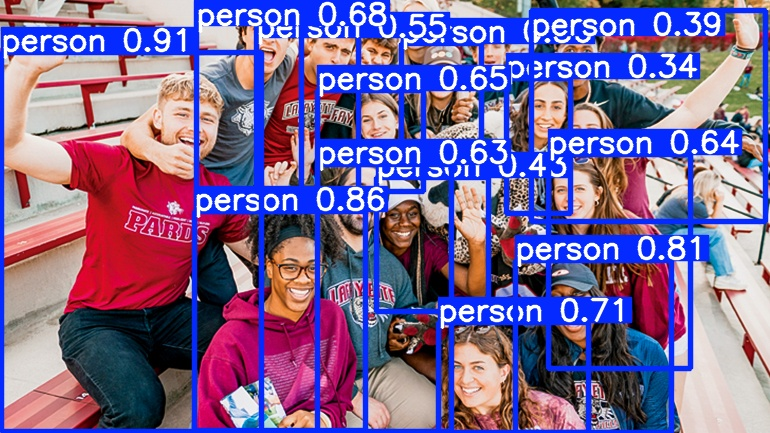

In [4]:
from IPython.display import Image, display
image_paths = glob.glob('/content/results/*')
# Loop through the list and display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=800))

# 4. Reset


In [5]:
#THIS IS JUST TO ALLOW USER TO RUN IT AGAIN FROM 0

import os
import glob
import shutil

# Define the directory path
content_dir = '/content'

# Define image extensions to look for
image_extensions = ('*.jpg', '*.jpeg', '*.png', '*.bmp', '*.gif', '*.tiff', '*.tif')

# Delete image files in '/content' directory
for extension in image_extensions:
    # Construct the search pattern
    search_pattern = os.path.join(content_dir, extension)
    # Find all files matching the current pattern
    files = glob.glob(search_pattern)
    # Delete each found file
    for file_path in files:
        try:
            os.remove(file_path)
            print(f'Deleted file: {file_path}')
        except Exception as e:
            print(f'Error deleting file {file_path}: {e}')

# Path to the 'results' folder
results_dir = os.path.join(content_dir, 'results')

# Delete the 'results' folder if it exists
if os.path.exists(results_dir):
    try:
        shutil.rmtree(results_dir)
        print(f'Deleted directory: {results_dir}')
    except Exception as e:
        print(f'Error deleting directory {results_dir}: {e}')
else:
    print(f'Directory not found: {results_dir}')

clear_output()